In [1134]:
# the libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from  sklearn.preprocessing import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import preprocessing
import pandas as pd

nba_df = pd.read_csv('final_data/nba_5_recent_perfomance.csv')

In [1135]:
nba_df.head(30)

,GAME_DATE,GAME_ID,H_NAME,A_NAME,SEASON,PTS_away_avg,FG_PCT_away_avg,FT_PCT_away_avg,FG3_PCT_away_avg,AST_away_avg,...,EFG_home_avg,PTS_FGA_home_avg,PIE_home_avg,POSS_home_avg,PACE_home_avg,OFF_EFC_home_avg,DEF_EFC_home_avg,ELO_BEFORE_home,ELO_BEFORE_away,HOME_TEAM_WINS
0,2010-10-26,21000003,LAL,HOU,2010,110.0,0.42,0.93,0.40,25.0,...,0.45,0.90,9.85,102.32,102.94,109.0,108.0,1500.000000,1500.000000,1
1,2010-10-26,21000002,POR,PHX,2010,92.0,0.49,0.69,0.47,15.0,...,0.51,1.01,13.56,82.14,91.61,114.0,106.0,1500.000000,1500.000000,1
2,2010-10-26,21000001,BOS,MIA,2010,80.0,0.36,0.72,0.40,15.0,...,0.57,1.13,12.08,77.86,91.57,96.0,98.0,1500.000000,1500.000000,1
3,2010-10-27,21000004,CLE,BOS,2010,80.0,0.36,0.72,0.40,15.0,...,0.50,0.99,8.31,85.78,85.36,111.0,91.0,1500.000000,1507.299516,1
4,2010-10-27,21000005,BKN,DET,2010,98.0,0.45,0.53,0.42,21.0,...,0.58,1.17,9.88,86.02,94.17,113.0,114.0,1500.000000,1500.000000,1
5,2010-10-27,21000006,PHI,MIA,2010,80.0,0.36,0.72,0.40,15.0,...,0.54,1.08,10.97,82.62,96.72,102.0,110.0,1500.000000,1492.700484,0
6,2010-10-27,21000007,TOR,NYK,2010,98.0,0.43,0.88,0.29,12.0,...,0.32,0.64,7.62,87.86,99.09,94.0,108.0,1500.000000,1500.000000,0
7,2010-10-27,21000008,MEM,ATL,2010,119.0,0.52,0.87,0.50,20.0,...,0.45,0.90,9.26,88.44,111.09,105.0,126.0,1500.000000,1500.000000,0
8,2010-10-27,21000009,MIN,SAC,2010,117.0,0.46,0.74,0.36,25.0,...,0.49,0.98,9.83,95.75,104.42,111.0,118.0,1500.000000,1500.000000,0
9,2010-10-27,21000016,LAC,POR,2010,92.0,0.49,0.69,0.47,15.0,...,0.44,0.87,8.92,79.85,86.68,101.0,115.0,1500.000000,1510.340441,0


In [1136]:
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'], format='%Y-%m-%d')

In [1137]:
cols_delete = ['GAME_DATE', 'GAME_ID', 'H_NAME', 'A_NAME', 'SEASON', 'HOME_TEAM_WINS']
def get_features_labels_from_df(df, cols_to_delete, label_col):
    return df.drop(cols_to_delete, axis=1), df[label_col]

In [1138]:
features, labels = get_features_labels_from_df(nba_df, cols_delete, 'HOME_TEAM_WINS')

In [1139]:
def get_normalized_features(features):
    tmp = preprocessing.normalize(features)
    return pd.DataFrame(tmp, columns=features.columns)

def get_powertrasform_data(features):
    # perform a yeo-johnson transform of the dataset
    pt = PowerTransformer(method='yeo-johnson')
    return pd.DataFrame(pt.fit_transform(features), columns=features.columns)

def get_robust_scaled_data(features):
    robust_scaler = RobustScaler()
    robust_scaler.fit(features)
    return pd.DataFrame(robust_scaler.transform(features), columns=features.columns)

def get_standard_scaled_data(features):
    robust_scaler = StandardScaler()
    robust_scaler.fit(features)
    return pd.DataFrame(robust_scaler.transform(features), columns=features.columns)

In [1140]:
normalized_features = get_normalized_features(features)
normalized_features =  get_standard_scaled_data(normalized_features)

In [1141]:
normalized_features

,PTS_away_avg,FG_PCT_away_avg,FT_PCT_away_avg,FG3_PCT_away_avg,AST_away_avg,REB_away_avg,FGM_away_avg,FGA_away_avg,FG3M_away_avg,FG3A_away_avg,...,EFFICACY_home_avg,EFG_home_avg,PTS_FGA_home_avg,PIE_home_avg,POSS_home_avg,PACE_home_avg,OFF_EFC_home_avg,DEF_EFC_home_avg,ELO_BEFORE_home,ELO_BEFORE_away
0,0.583277,0.398308,0.829280,0.620345,0.536163,0.715885,0.566803,0.601420,0.337851,0.311900,...,0.445842,0.311305,0.303148,0.441757,0.610065,0.564434,0.471119,0.472366,0.518767,0.553758
1,0.361118,0.624678,0.467979,0.751504,0.211347,0.131818,0.439696,0.255081,0.339368,0.252227,...,0.649681,0.454196,0.436027,0.709132,0.261226,0.359628,0.543056,0.450345,0.529953,0.564780
2,0.212140,0.217041,0.516843,0.625219,0.212690,0.365178,0.177994,0.291880,0.340425,0.314616,...,0.574701,0.596608,0.580094,0.605921,0.189489,0.363565,0.307941,0.342351,0.537746,0.572458
3,0.208537,0.212989,0.512923,0.622608,0.210938,0.361617,0.174937,0.287638,0.339046,0.313161,...,0.334472,0.430098,0.411654,0.334174,0.324165,0.241148,0.502067,0.239792,0.527578,0.576114
4,0.435882,0.497026,0.222675,0.659184,0.407550,0.310352,0.537622,0.438398,0.339022,0.292730,...,0.457802,0.614945,0.622079,0.446021,0.328303,0.406037,0.528464,0.560654,0.527406,0.562270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,0.477500,0.406186,0.653914,0.606333,0.495014,0.364465,0.408887,0.274224,0.388642,0.457585,...,0.578064,0.479759,0.461869,0.576719,0.363644,0.494940,0.585949,0.453331,0.682602,0.397087
14141,0.408515,0.386385,0.695794,0.505217,0.464035,0.551912,0.294896,0.273261,0.382142,0.425163,...,0.286810,0.324787,0.328344,0.291815,0.404612,0.531926,0.395335,0.665605,0.652248,0.436437
14142,0.420685,0.473887,0.645183,0.430512,0.364099,0.415812,0.459357,0.218725,0.380286,0.426931,...,0.616992,0.479417,0.484755,0.621024,0.350414,0.469420,0.616123,0.493562,0.548577,0.541444
14143,0.520737,0.564027,0.612701,0.580413,0.309598,0.676756,0.629702,0.501635,0.509164,0.477693,...,0.455901,0.532949,0.527418,0.494901,0.468438,0.610016,0.418766,0.650296,0.364233,0.705869


In [1152]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=24)

In [1153]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.3, random_state=42, shuffle=True)

In [1154]:
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

eigenvalues:
[28.77011613  9.02985011  6.90259389  5.72378153  4.88203387  3.79655915
  3.45189395  3.03822062  2.37727699  2.25090654  2.16432832  1.90901088
  1.81301983  1.60904308  1.50558156  1.35677782  1.33565877  1.21677831
  1.16537351  1.14867991  1.12256376  0.98771339  0.93631618  0.90983774
  0.80303596  0.79511565  0.72588198  0.68332715]



Text(0, 0.5, 'Explained variance (%)')

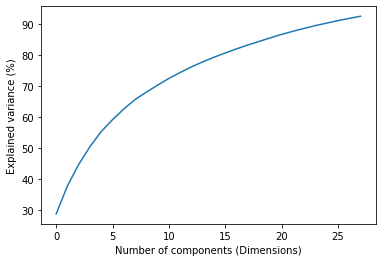

In [1155]:
from sklearn.decomposition import PCA
print('eigenvalues:')
print(pca.explained_variance_ratio_*100)
print()
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [1156]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define model
model = LogisticRegression(random_state=42)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l2']
space['C'] = loguniform(1e-5, 300)
# define search
scoring = [
    'accuracy', 'balanced_accuracy', 'f1', 'roc_auc'
]
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=42, verbose=0)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6697632225381973
Best Hyperparameters: {'C': 0.23010125790236527, 'penalty': 'l2', 'solver': 'liblinear'}


In [1085]:
from sklearn.model_selection import GridSearchCV

# define model
model = LogisticRegression(random_state=42)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l2']
space['C'] = np.arange(0.002, 0.0026, 0.000001)
# define search
scoring = [
    'accuracy', 'balanced_accuracy', 'f1', 'roc_auc'
]
search = GridSearchCV(model, space, scoring=scoring, refit='accuracy', n_jobs=-1, cv=cv, verbose=0)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6724228833916018
Best Hyperparameters: {'C': 0.002512000000000068, 'penalty': 'l2', 'solver': 'liblinear'}


In [1122]:
from sklearn.model_selection import cross_val_score
#Best Score: 0.6719525560161602  pca n_comp 23 standard features and normalization
#Best Hyperparameters: {'C': 0.002488011986872417, 'penalty': 'l2', 'solver': 'liblinear'}

#Best Score: 0.6720535321242035
#Best Hyperparameters: {'C': 0.0019005811754019158, 'penalty': 'l2', 'solver': 'liblinear'}

#Best Score: 0.6724228833916018
#Best Hyperparameters: {'C': 0.0025200000000000014, 'penalty': 'l2', 'solver': 'liblinear'}
log_regr_model = LogisticRegression(random_state=42, C=0.002512, penalty='l2', solver='liblinear')
scores = cross_val_score(log_regr_model, X_train, y_train, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.014810528488860981
mean: 0.6724228494157859
[0.67810293 0.64444444 0.66464646 0.66262626 0.68383838 0.69292929
 0.67474747 0.67272727 0.67272727 0.67979798 0.67911201 0.65959596
 0.67878788 0.65858586 0.6969697  0.7010101  0.66868687 0.64848485
 0.65555556 0.67878788 0.68415742 0.67474747 0.66464646 0.66363636
 0.66565657 0.65555556 0.71111111 0.66969697 0.66262626 0.66868687]


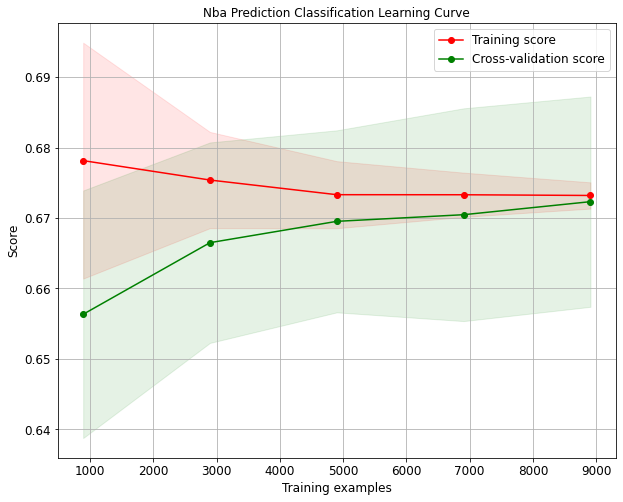

In [1123]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(log_regr_model, X_train, y_train,
                                     cv=cv, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(10,8), title_fontsize="large", text_fontsize="large",
                                     title="Nba Prediction Classification Learning Curve");

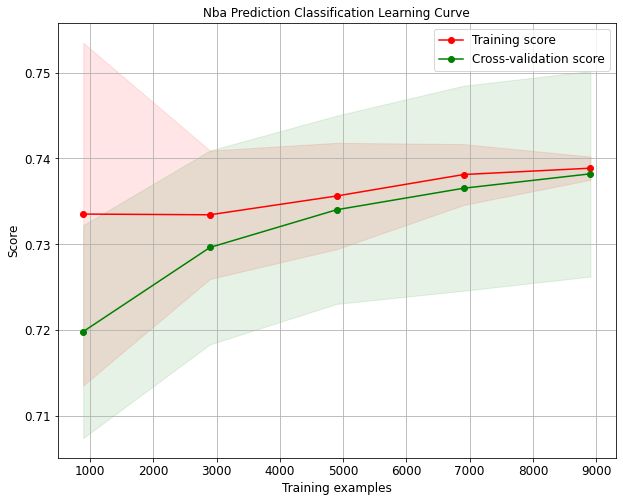

In [1124]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(log_regr_model, X_train, y_train,
                                     cv=cv, shuffle=True, scoring="f1",
                                     n_jobs=-1, figsize=(10,8), title_fontsize="large", text_fontsize="large",
                                     title="Nba Prediction Classification Learning Curve");

In [1125]:
log_regr_model.fit(X_train, y_train)
log_regr_predict = log_regr_model.predict(X_test)
log_reg_prediction_prob = log_regr_model.predict_proba(X_test)

In [1126]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
print(metrics.classification_report(y_test, log_regr_predict))

              precision    recall  f1-score   support

           0       0.60      0.50      0.54      1752
           1       0.69      0.77      0.73      2492

    accuracy                           0.66      4244
   macro avg       0.64      0.63      0.64      4244
weighted avg       0.65      0.66      0.65      4244



In [1127]:
print(metrics.f1_score(y_test, log_regr_predict))

0.7260377358490566


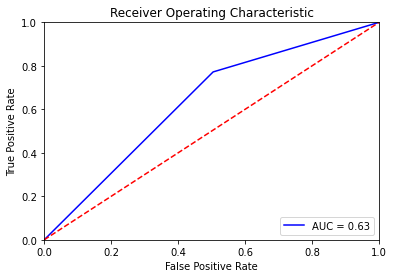

In [1128]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, log_regr_predict)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


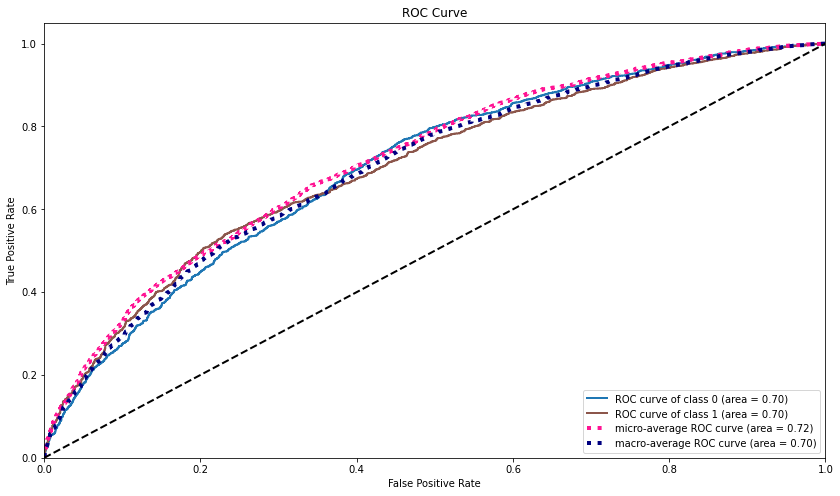

In [1129]:
skplt.metrics.plot_roc_curve(y_test, log_reg_prediction_prob,
                             title="ROC Curve", figsize=(14,8), cmap='tab10');

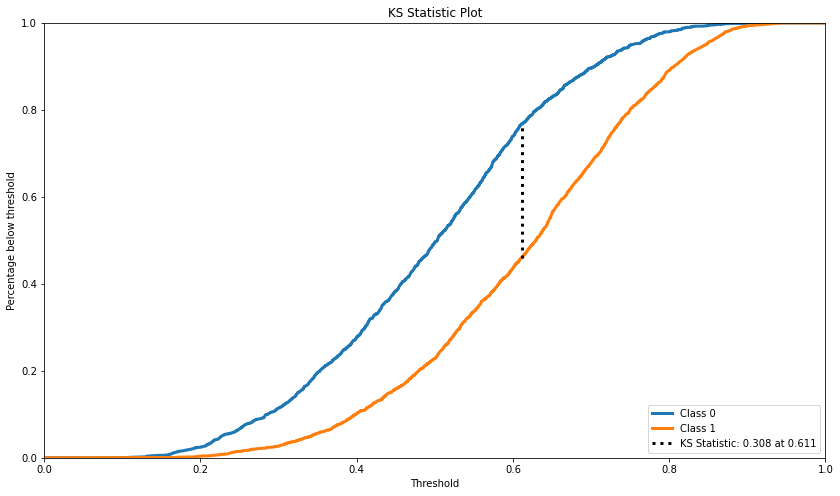

In [1130]:
skplt.metrics.plot_ks_statistic(y_test, log_reg_prediction_prob, figsize=(14,8));

<AxesSubplot:>

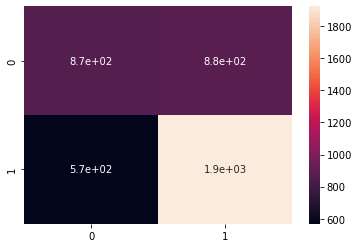

In [1131]:
conf_matrix = metrics.confusion_matrix(y_test, log_regr_predict)
sns.heatmap(conf_matrix, annot=True)

In [1132]:
def get_prediction_df(pred_prob, pred, full_df, test_df):
    concat = [pd.DataFrame(log_reg_prediction_prob), pd.DataFrame(log_regr_predict)]
    final_prediction = pd.concat(concat, axis=1)
    final_prediction.columns = ['AWAY_WIN_PROBABILITY', 'HOME_WIN_PROBABILITY', 'RESULT_PREDICTION']
    final_prediction['RESULT_PREDICTION'] = final_prediction['RESULT_PREDICTION'].apply(lambda value: 'Away Team Win' if value == 0 else 'Home Team Win')
    games = pd.merge(full_df, pd.DataFrame(test_df), left_index=True, right_index=True)
    games = games.iloc[:,0:5].copy()
    final_prediction = pd.concat([games.reset_index(drop=True), final_prediction], axis=1)
    return final_prediction

In [1133]:
final_prediction_nba_log_regr = get_prediction_df(log_reg_prediction_prob, log_regr_predict, nba_df, X_test)
final_prediction_nba_log_regr

,GAME_DATE,GAME_ID,H_NAME,A_NAME,SEASON,AWAY_WIN_PROBABILITY,HOME_WIN_PROBABILITY,RESULT_PREDICTION
0,2010-10-26,21000003,LAL,HOU,2010,0.653661,0.346339,Away Team Win
1,2010-10-26,21000002,POR,PHX,2010,0.411314,0.588686,Home Team Win
2,2010-10-26,21000001,BOS,MIA,2010,0.279816,0.720184,Home Team Win
3,2010-10-27,21000004,CLE,BOS,2010,0.121852,0.878148,Home Team Win
4,2010-10-27,21000005,BKN,DET,2010,0.651133,0.348867,Away Team Win
...,...,...,...,...,...,...,...,...
4239,2014-01-10,21300536,NOP,DAL,2013,0.630995,0.369005,Away Team Win
4240,2014-01-11,21300544,WAS,HOU,2013,0.607965,0.392035,Away Team Win
4241,2014-01-11,21300545,DET,PHX,2013,0.356017,0.643983,Home Team Win
4242,2014-01-11,21300543,TOR,BKN,2013,0.321037,0.678963,Home Team Win


# Random Forest Classifier Model
### We will also try another model: a Random Forest Classifier. We will optimize parameters using a similar process as above.

In [678]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
               'bootstrap': bootstrap}

In [679]:
# Create base model to tune
rf = RandomForestClassifier(oob_score=True)
# Create random search model and fit the data
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100, cv = cv,
    verbose=0, random_state=42,
    scoring='accuracy')
rf_random.fit(X_train, y_train)
rf_random.best_params_

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
660 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
660 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation

{'n_estimators': 124,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 46,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': True}

In [680]:
#{'n_estimators': 246,'min_samples_split': 2,'min_samples_leaf': 4,'max_leaf_nodes': 47,'max_features': 'auto', 'max_depth': 80, 'bootstrap': True} score
# 0.6995401694989088
print('Best Score: %s' % rf_random.best_score_)

Best Score: 0.6642768931108153


In [1157]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.015033710378368929
mean: 0.6538393691370482
[0.66195762 0.63434343 0.64040404 0.64646465 0.66262626 0.68484848
 0.67272727 0.65959596 0.65959596 0.65454545 0.64581231 0.64141414
 0.66565657 0.63535354 0.67474747 0.67979798 0.63838384 0.63333333
 0.63535354 0.65656566 0.6629667  0.66363636 0.64747475 0.65454545
 0.66161616 0.63535354 0.67777778 0.65555556 0.63434343 0.63838384]


In [ ]:
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale', 0.1, 1.0]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search_svm = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result_svm = grid_search_svm.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result_svm.best_score_, grid_result_svm.best_params_))
means = grid_result_svm.cv_results_['mean_test_score']
stds = grid_result_svm.cv_results_['std_test_score']
params = grid_result_svm.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [1003]:
svm = SVC(random_state=42)
scores = cross_val_score(svm, X_train, y_train, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.011454193844862133
mean: 0.6530645509444095
[0.65825341 0.65555556 0.67929293 0.64848485 0.64747475 0.65774861
 0.64545455 0.66212121 0.64848485 0.64949495 0.66683493 0.64242424
 0.63838384 0.66262626 0.63333333]


# Naive Bayes

In [1160]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-20, num=500)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=cv, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 30 folds for each of 500 candidates, totalling 15000 fits
GaussianNB(var_smoothing=0.0043178797273320255)


In [1161]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB(var_smoothing=0.0043178797273320255)
scores = cross_val_score(naive, X_train, y_train, cv=cv, scoring='accuracy')
print('std: %s' % scores.std())
print('mean: %s' % scores.mean())
print(scores)

std: 0.015016106695763863
mean: 0.6654533563009849
[0.67810293 0.62626263 0.66161616 0.66060606 0.67676768 0.68585859
 0.65555556 0.66262626 0.66565657 0.67878788 0.67810293 0.64747475
 0.67979798 0.65353535 0.68686869 0.69292929 0.65757576 0.63939394
 0.64949495 0.67373737 0.67911201 0.66060606 0.65353535 0.67070707
 0.65050505 0.66161616 0.68282828 0.67474747 0.66262626 0.65656566]


In [1162]:
from sklearn import metrics
naive.fit(X_train, y_train)
print(metrics.classification_report(y_test, naive.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.45      0.52      1752
           1       0.67      0.79      0.72      2492

    accuracy                           0.65      4244
   macro avg       0.63      0.62      0.62      4244
weighted avg       0.64      0.65      0.64      4244



In [1163]:
print(metrics.f1_score(y_test, naive.predict(X_test)))

0.7241443108233117


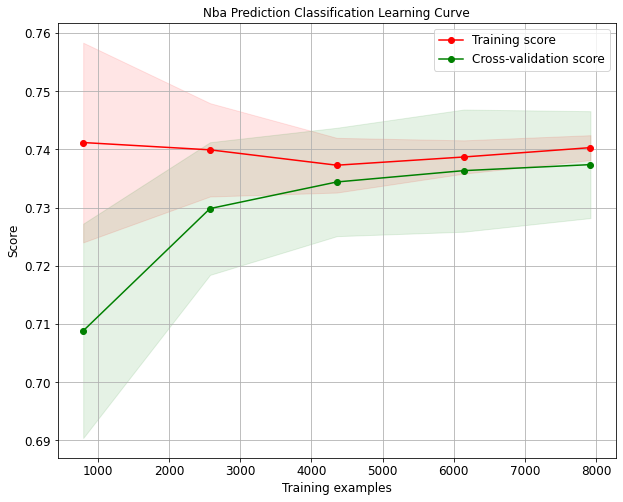

In [1008]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(naive, X_train, y_train,
                                     cv=cv, shuffle=True, scoring="f1",
                                     n_jobs=-1, figsize=(10,8), title_fontsize="large", text_fontsize="large",
                                     title="Nba Prediction Classification Learning Curve");

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


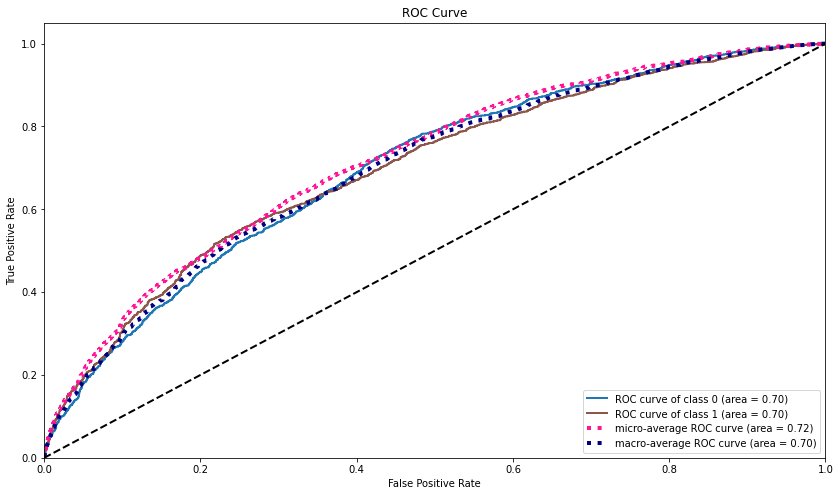

In [1009]:
skplt.metrics.plot_roc_curve(y_test, naive.predict_proba(X_test),
                             title="ROC Curve", figsize=(14,8), cmap='tab10');